In [2]:
import coinmetrics
import numpy as np
import datetime as dt
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from pca import pca
from sklearn import preprocessing
from scipy import stats
from scipy.cluster import hierarchy

plt.rcParams["figure.figsize"] = (20,10)


In [ ]:
import coinmetrics
cm = coinmetrics.Community()
moneda = 'btc'
available_data_types = cm.get_available_data_types_for_asset(moneda)

#Métricas totales disponibles para la moneda.
metrica = "AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMVRVCur,CapMrktCurUSD,CapRealUSD,DiffMean,FeeMeanNtv,\
FeeMeanUSD,FeeMedNtv,FeeMedUSD,FeeTotNtv,FeeTotUSD,HashRate,IssContNtv,IssContPctAnn,IssContUSD,IssTotNtv,IssTotUSD,\
NVTAdj,NVTAdj90,PriceBTC,PriceUSD,ROI1yr,ROI30d,SplyCur,SplyExpFut10yrCMBI,SplyFF,TxCnt,TxTfrCnt,TxTfrValAdjNtv,\
TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValUSD,VtyDayRet180d,\
VtyDayRet30d, "

#Métricas usadas para análisis final.
#metrica = "AdrActCnt,CapMrktCurUSD,DiffMean,PriceUSD,\
#FeeTotNtv,SplyCur,SplyFF,TxTfrCnt,TxTfrValMeanUSD,TxTfrValUSD,VtyDayRet30d"

begin_timestamp = "2012-02-02"
end_timestamp = '2021-08-11'
asset_data = cm.get_asset_data_for_time_range(moneda, metrica ,begin_timestamp, end_timestamp)

In [20]:
btc = pd.read_csv('/Users/sacbe/Documents/Tesis/Algoritmos/btc.csv', sep = ',')

In [ ]:
for column in btc.columns:
    print(column)

In [21]:
btc.info()
#btc[btc.date > '2012-02-02']
btc = btc[btc.date > '2012-02-02']
btc = btc.set_index('date')
btc.index = pd.to_datetime(btc.index)
#btc = btc[['AdrActCnt','BlkCnt','BlkSizeMeanByte','CapMVRVCur','CapMrktCurUSD','CapRealUSD','DiffMean','FeeMeanNtv','FeeMeanUSD','FeeMedNtv','FeeMedUSD','FeeTotNtv','FeeTotUSD','HashRate','IssContNtv','IssContPctAnn','IssContUSD','IssTotNtv','IssTotUSD','NVTAdj','NVTAdj90','PriceBTC',"PriceUSD",'ROI1yr','ROI30d','SplyCur','SplyExpFut10yr','SplyFF','TxCnt','TxTfrCnt','TxTfrValAdjNtv','TxTfrValAdjUSD','TxTfrValMeanNtv','TxTfrValMeanUSD','TxTfrValMedNtv','TxTfrValMedUSD','VtyDayRet180d','VtyDayRet30d']]

print(btc)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4603 entries, 0 to 4602
Columns: 140 entries, date to VtyDayRet30d
dtypes: float64(111), int64(28), object(1)
memory usage: 4.9+ MB
            AdrActCnt  AdrBal1in100KCnt  AdrBal1in100MCnt  AdrBal1in10BCnt  \
date                                                                         
2012-02-03      17088              8493            165725           290241   
2012-02-04      16038              8475            165736           290349   
2012-02-05      14720              8475            166030           290785   
2012-02-06      14174              8492            166181           291134   
2012-02-07      14474              8501            166171           291422   
...               ...               ...               ...              ...   
2021-08-06     894265              9358           2228531         15829197   
2021-08-07     724467              9365           2229449         15840610   
2021-08-08     740945              936

In [22]:
btc.isnull().sum()

AdrActCnt           0
AdrBal1in100KCnt    0
AdrBal1in100MCnt    0
AdrBal1in10BCnt     0
AdrBal1in10KCnt     0
                   ..
TxTfrValMedNtv      0
TxTfrValMedUSD      0
VelCur1yr           0
VtyDayRet180d       0
VtyDayRet30d        0
Length: 139, dtype: int64

In [6]:
#Inputación de datos faltantes usando interpolación y eliminación de nans    

# Convertir de Coin Metrics a dataframe solo si se descarga con la API
#db = coinmetrics.cm_to_pandas(asset_data)
#db.index = np.arange(len(db))

In [23]:
db = btc.interpolate(method='polynomial', order=2, limit_direction= "both")
print(db)

            AdrActCnt  AdrBal1in100KCnt  AdrBal1in100MCnt  AdrBal1in10BCnt  \
date                                                                         
2012-02-03      17088              8493            165725           290241   
2012-02-04      16038              8475            165736           290349   
2012-02-05      14720              8475            166030           290785   
2012-02-06      14174              8492            166181           291134   
2012-02-07      14474              8501            166171           291422   
...               ...               ...               ...              ...   
2021-08-06     894265              9358           2228531         15829197   
2021-08-07     724467              9365           2229449         15840610   
2021-08-08     740945              9362           2230031         15828073   
2021-08-09     934412              9374           2230456         15808357   
2021-08-10     875882              9366           2230530       

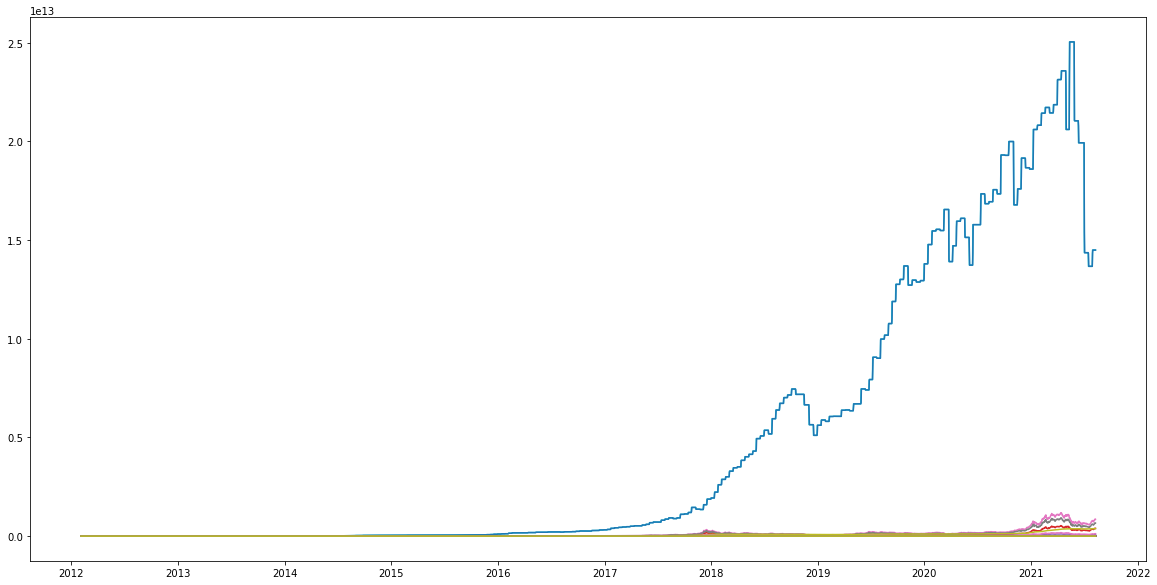

In [24]:
plt.plot(db)
plt.show()

In [25]:
for name in db.columns:
    db[name] = db[name].fillna(0)    

In [54]:
#Eliminación de outliers de cada métrica
#Q1 = db.quantile(0.25)
#Q3 = db.quantile(0.75)
#IQR = Q3 - Q1

#db = db[~((db < (Q1 - 1.5 * IQR)) |(db > (Q3 + 1.5 * IQR))).any(axis=1)]

In [26]:
df = pd.DataFrame(db.values)
df.columns = db.columns

In [28]:
#Eliminación de outliers multivariados.
from sklearn.covariance import EmpiricalCovariance, MinCovDet

def m_detectOutliers(data, extreme=False):
    robust_cov = MinCovDet().fit(data)
    m = robust_cov.mahalanobis(data)
    print(m)
    # one popular way to specify the threshold
    me = np.mean(m)
    t = 3. * me if extreme else 2. * me
    outliers = []
    for i in range(len(m)):
        if m[i] > t:
            outliers.append(i)  # index of the outlier
    return np.array(outliers)

df_wo = df.drop(m_detectOutliers(df, extreme = False))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/covariance/_robust_covariance.py:647: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn("The covariance matrix associated to your dataset "


[1.29240537e+02 1.32394811e+02 1.28674775e+02 ... 3.64770555e+07
 3.91200385e+07 3.83065446e+07]


In [29]:
print(df_wo)

      AdrActCnt  AdrBal1in100KCnt  AdrBal1in100MCnt  AdrBal1in10BCnt  \
0       17088.0            8493.0          165725.0         290241.0   
1       16038.0            8475.0          165736.0         290349.0   
2       14720.0            8475.0          166030.0         290785.0   
3       14174.0            8492.0          166181.0         291134.0   
4       14474.0            8501.0          166171.0         291422.0   
...         ...               ...               ...              ...   
3206   999523.0            9020.0         2231759.0       14565152.0   
3207   915336.0            9016.0         2220100.0       14563088.0   
3208   845204.0            9032.0         2213276.0       14563566.0   
3219  1115848.0            9036.0         2211895.0       14590883.0   
3220  1099990.0            9013.0         2209908.0       14555125.0   

      AdrBal1in10KCnt  AdrBal1in10MCnt  AdrBal1in1BCnt  AdrBal1in1KCnt  \
0               912.0         127794.0        250654.0       

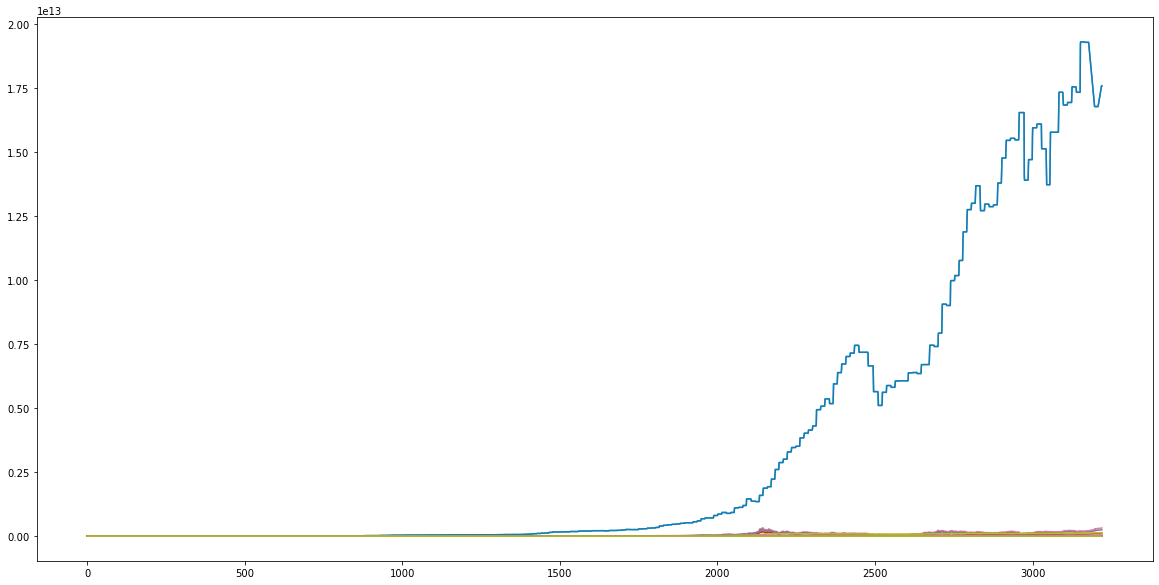

In [30]:
plt.plot(df_wo)
plt.show()

In [31]:
#Normalización de datos

x = df_wo.values
#x = df_regresion_wo.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df.columns = df_wo.columns
#df.columns = df_regresion_wo.columns

In [36]:
# Solo para motivos de comparación de outliers, no correr

x = db.values
#x = df_regresion_wo.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_with_out = pd.DataFrame(x_scaled)
df_with_out.columns = df_wo.columns
#df.columns = df_regresion_wo.columns

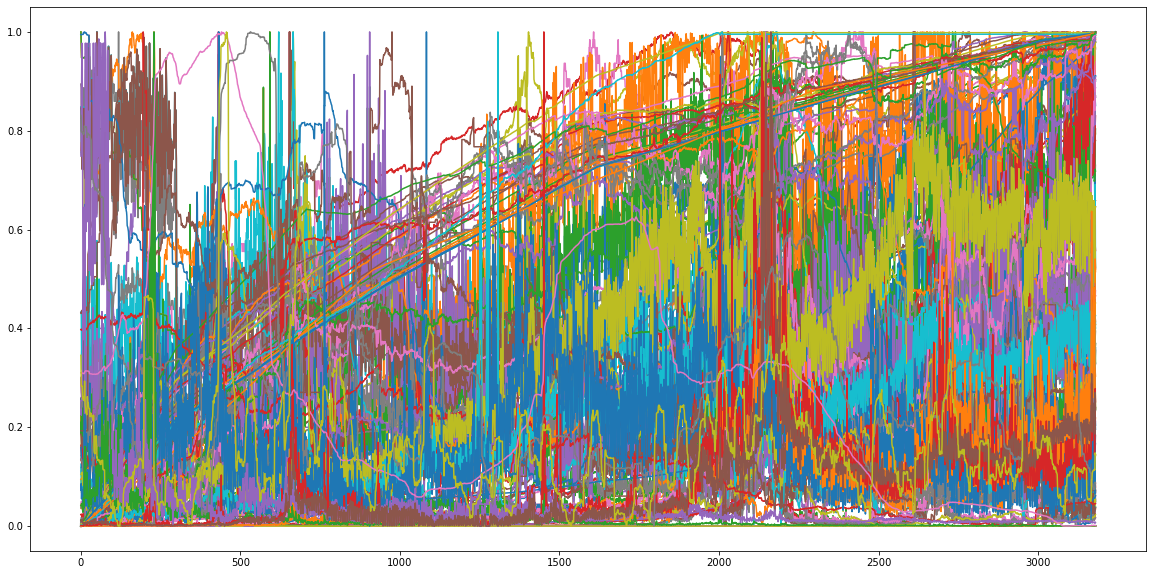

In [33]:
plt.plot(df)
plt.show()

In [84]:
#Analisis de regresión multiple

from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

#Con todas las metricas

#X = df[['AdrActCnt','BlkCnt','BlkSizeMeanByte','CapMVRVCur','CapMrktCurUSD','CapRealUSD','DiffMean','FeeMeanNtv','FeeMeanUSD','FeeMedNtv','FeeMedUSD','FeeTotNtv','FeeTotUSD','HashRate','IssContNtv','IssContPctAnn','IssContUSD','IssTotNtv','IssTotUSD','NVTAdj','NVTAdj90','PriceBTC','ROI1yr','ROI30d','SplyCur','SplyExpFut10yr','SplyFF','TxCnt','TxTfrCnt','TxTfrValAdjNtv','TxTfrValAdjUSD','TxTfrValMeanNtv','TxTfrValMeanUSD','TxTfrValMedNtv','TxTfrValMedUSD','VtyDayRet180d','VtyDayRet30d']]
#y = df['PriceUSD']

#CON todas las 140 métricas

X = df[["AdrActCnt","AdrBal1in100KCnt","AdrBal1in100MCnt","AdrBal1in10BCnt","AdrBal1in10KCnt","AdrBal1in10MCnt","AdrBal1in1BCnt","AdrBal1in1KCnt","AdrBal1in1MCnt","AdrBalCnt","AdrBalNtv0.001Cnt","AdrBalNtv0.01Cnt","AdrBalNtv0.1Cnt","AdrBalNtv100Cnt","AdrBalNtv100KCnt","AdrBalNtv10Cnt","AdrBalNtv10KCnt","AdrBalNtv1Cnt","AdrBalNtv1KCnt","AdrBalNtv1MCnt","AdrBalUSD100Cnt","AdrBalUSD100KCnt","AdrBalUSD10Cnt","AdrBalUSD10KCnt","AdrBalUSD10MCnt","AdrBalUSD1Cnt","AdrBalUSD1KCnt","AdrBalUSD1MCnt","AssetEODCompletionTime","BlkCnt","BlkSizeMeanByte","BlkWghtMean","BlkWghtTot","CapAct1yrUSD","CapMVRVCur","CapMVRVFF","CapMrktCurUSD","CapMrktFFUSD","CapRealUSD","DiffLast","DiffMean","FeeByteMeanNtv","FeeMeanNtv","FeeMeanUSD","FeeMedNtv","FeeMedUSD","FeeTotNtv","FeeTotUSD","FlowInExNtv","FlowInExUSD","FlowOutExNtv","FlowOutExUSD","FlowTfrFromExCnt","HashRate","HashRate30d","IssContNtv","IssContPctAnn","IssContPctDay","IssContUSD","IssTotNtv","IssTotUSD","NDF","NVTAdj","NVTAdj90","NVTAdjFF","NVTAdjFF90","PriceBTC","ROI1yr","ROI30d","RevAllTimeUSD","RevHashNtv","RevHashRateNtv","RevHashRateUSD","RevHashUSD","RevNtv","RevUSD","SER","SplyAct10yr","SplyAct180d","SplyAct1d","SplyAct1yr","SplyAct2yr","SplyAct30d","SplyAct3yr","SplyAct4yr","SplyAct5yr","SplyAct7d","SplyAct90d","SplyActEver","SplyActPct1yr","SplyAdrBal1in100K","SplyAdrBal1in100M","SplyAdrBal1in10B","SplyAdrBal1in10K","SplyAdrBal1in10M","SplyAdrBal1in1B","SplyAdrBal1in1K","SplyAdrBal1in1M","SplyAdrBalNtv0.001","SplyAdrBalNtv0.01","SplyAdrBalNtv0.1","SplyAdrBalNtv1","SplyAdrBalNtv10","SplyAdrBalNtv100","SplyAdrBalNtv100K","SplyAdrBalNtv10K","SplyAdrBalNtv1K","SplyAdrBalNtv1M","SplyAdrBalUSD1","SplyAdrBalUSD10","SplyAdrBalUSD100","SplyAdrBalUSD100K","SplyAdrBalUSD10K","SplyAdrBalUSD10M","SplyAdrBalUSD1K","SplyAdrBalUSD1M","SplyAdrTop100","SplyAdrTop10Pct","SplyAdrTop1Pct","SplyCur","SplyExpFut10yr","SplyFF","SplyMiner0HopAllNtv","SplyMiner0HopAllUSD","SplyMiner1HopAllNtv","SplyMiner1HopAllUSD","TxCnt","TxCntSec","TxTfrCnt","TxTfrValAdjNtv","TxTfrValAdjUSD","TxTfrValMeanNtv","TxTfrValMeanUSD","TxTfrValMedNtv","TxTfrValMedUSD","VelCur1yr","VtyDayRet180d","VtyDayRet30d"]]
y = df["PriceUSD"]

X_train, X_test, y_train, y_test = train_test_split(X, y.values.reshape(-1,1), train_size   = 0.8, random_state = 1234, shuffle = True)

In [85]:
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.752e+07
Date:                Wed, 11 Aug 2021   Prob (F-statistic):               0.00
Time:                        19:20:07   Log-Likelihood:                 17944.
No. Observations:                2546   AIC:                        -3.562e+04
Df Residuals:                    2413   BIC:                        -3.484e+04
Df Model:                         132                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

## Eliminamos las variables con p-value >= 0.05 ya que no aportan de forma significativa al modelo

## Total **variables restantes 29**

In [37]:
# sin quitar outliers univariados
#df_regresion_wo = df.drop(['DiffMean',"FeeMeanNtv","FeeMedNtv","FeeTotUSD","TxCnt","TxTfrValAdjUSD","TxTfrValMeanNtv","TxTfrValMedNtv","TxTfrValMedUSD"], axis=1)
# sin outliers univariados
#df_regresion_wo = df.drop(['DiffMean',"FeeMeanNtv","IssContNtv","IssTotNtv","NVTAdj","NVTAdj90","PriceBTC","TxTfrCnt","TxTfrValAdjNtv","TxTfrValMeanNtv"], axis=1)
# con todas la 140 métricas sin quitar outliers univariados
df_regresion_wo = df.drop(["AdrActCnt","AdrBal1in1BCnt","AdrBal1in1KCnt","AdrBalNtv0.01Cnt","AdrBalNtv100Cnt","AdrBalNtv10KCnt","AdrBalUSD10MCnt","BlkWghtMean","CapRealUSD","DiffMean","FeeMeanUSD","FeeMedNtv","FeeTotNtv","FeeTotUSD","FlowInExNtv","FlowInExUSD","FlowOutExNtv","FlowOutExUSD","IssContNtv","IssContPctAnn","IssContPctDay","IssContUSD","IssTotNtv","IssTotUSD","NDF","ROI30d","RevHashNtv","RevHashRateNtv","RevNtv","RevUSD","SplyAct180d","SplyAct1d","SplyAct30d","SplyAct3yr","SplyAct90d","SplyAdrBal1in1B","SplyAdrBal1in1K","SplyAdrBalNtv0.01","SplyAdrBalNtv0.1","SplyAdrBalNtv100","SplyAdrBalNtv10K","SplyAdrBalUSD1","SplyAdrBalUSD10","SplyAdrBalUSD100","SplyAdrBalUSD1K","SplyAdrBalUSD1M","SplyAdrTop100","SplyCur","SplyMiner0HopAllNtv","TxTfrCnt","TxTfrValAdjNtv","TxTfrValMeanNtv","TxTfrValMeanUSD","TxTfrValMedNtv","TxTfrValMedUSD","VelCur1yr","VtyDayRet180d","VtyDayRet30d"], axis=1)
df_with_out = df_with_out.drop(["AdrActCnt","AdrBal1in1BCnt","AdrBal1in1KCnt","AdrBalNtv0.01Cnt","AdrBalNtv100Cnt","AdrBalNtv10KCnt","AdrBalUSD10MCnt","BlkWghtMean","CapRealUSD","DiffMean","FeeMeanUSD","FeeMedNtv","FeeTotNtv","FeeTotUSD","FlowInExNtv","FlowInExUSD","FlowOutExNtv","FlowOutExUSD","IssContNtv","IssContPctAnn","IssContPctDay","IssContUSD","IssTotNtv","IssTotUSD","NDF","ROI30d","RevHashNtv","RevHashRateNtv","RevNtv","RevUSD","SplyAct180d","SplyAct1d","SplyAct30d","SplyAct3yr","SplyAct90d","SplyAdrBal1in1B","SplyAdrBal1in1K","SplyAdrBalNtv0.01","SplyAdrBalNtv0.1","SplyAdrBalNtv100","SplyAdrBalNtv10K","SplyAdrBalUSD1","SplyAdrBalUSD10","SplyAdrBalUSD100","SplyAdrBalUSD1K","SplyAdrBalUSD1M","SplyAdrTop100","SplyCur","SplyMiner0HopAllNtv","TxTfrCnt","TxTfrValAdjNtv","TxTfrValMeanNtv","TxTfrValMeanUSD","TxTfrValMedNtv","TxTfrValMedUSD","VelCur1yr","VtyDayRet180d","VtyDayRet30d"], axis=1)

In [24]:
print(df_regresion_wo)

      AdrBal1in100KCnt  AdrBal1in100MCnt  AdrBal1in10BCnt  AdrBal1in10KCnt  \
0             0.044367          0.000000         0.000000         0.233516   
1             0.035394          0.000005         0.000007         0.241758   
2             0.035394          0.000146         0.000038         0.260989   
3             0.043868          0.000218         0.000062         0.258242   
4             0.048355          0.000213         0.000082         0.263736   
...                ...               ...              ...              ...   
3178          0.307079          0.988554         0.985566         0.892857   
3179          0.305085          0.982976         0.985424         0.901099   
3180          0.313061          0.979711         0.985457         0.898352   
3181          0.315055          0.979050         0.987343         1.000000   
3182          0.303589          0.978099         0.984874         1.000000   

      AdrBal1in10MCnt  AdrBal1in1MCnt  AdrBalCnt  AdrBalNtv0.00

In [25]:
#Carga de modelo de PCA para analisis.

model = pca()
# Fit transform
out = model.fit_transform(df_regresion_wo)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [81] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [5] that covers the [95.00%] explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [81] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [6] that covers the [95.00%] explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


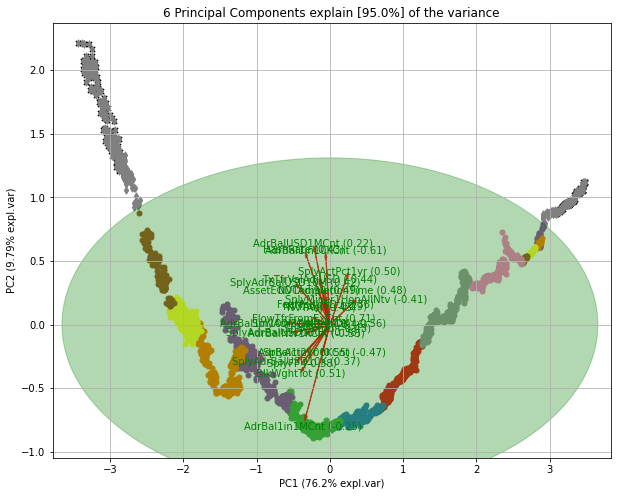

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'6 Principal Components explain [95.0%] of the variance'}, xlabel='PC1 (76.2% expl.var)', ylabel='PC2 (9.79% expl.var)'>)

In [39]:
model2 = pca()
# Fit transform
out = model2.fit_transform(df_with_out)
model2.biplot(legend=False, SPE=True, hotellingt2=True, label = False)

In [29]:
print(out['topfeat'])

       PC              feature   loading  type
0     PC1     AdrBal1in100MCnt -0.177301  best
1     PC2          HashRate30d  0.241474  best
2     PC3    SplyAdrBalNtv100K -0.515403  best
3     PC4        SplyActPct1yr  0.473091  best
4     PC5    SplyAdrBalNtv100K -0.356343  best
..    ...                  ...       ...   ...
96   PC73      SplyAdrBal1in1M  0.598131  weak
97   PC48    SplyAdrBalUSD100K  0.314202  weak
98   PC53       SplyAdrTop1Pct  0.348355  weak
99   PC65  SplyMiner0HopAllUSD  0.406419  weak
100  PC78                TxCnt  0.707107  weak

[101 rows x 4 columns]


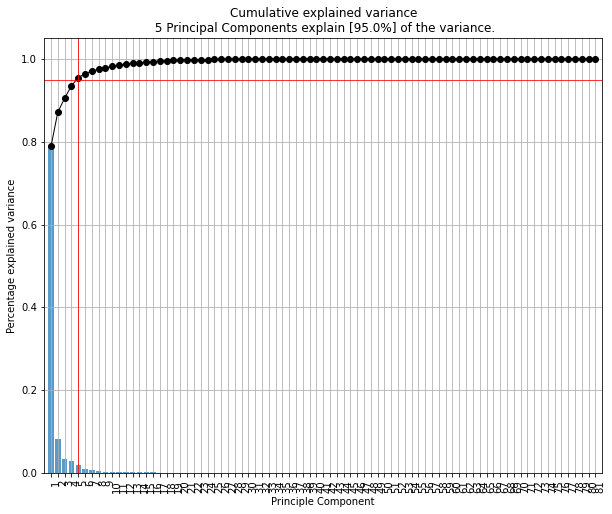

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Cumulative explained variance\n 5 Principal Components explain [95.0%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

<Figure size 1440x720 with 0 Axes>

In [30]:
model.plot()

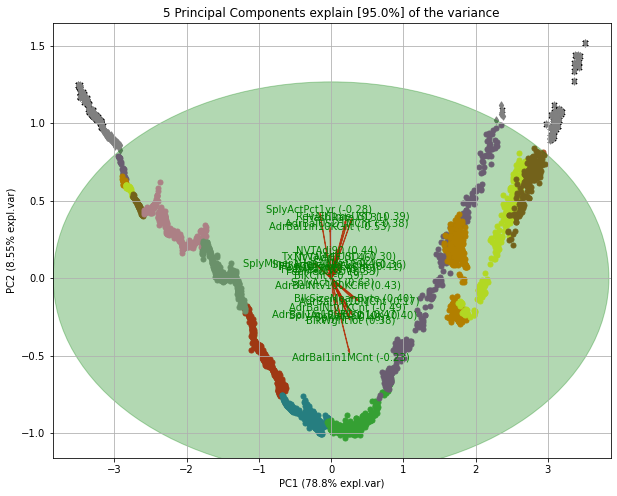

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'5 Principal Components explain [95.0%] of the variance'}, xlabel='PC1 (78.8% expl.var)', ylabel='PC2 (8.55% expl.var)'>)

In [26]:
model.biplot(legend=False, SPE=True, hotellingt2=True, label = False)

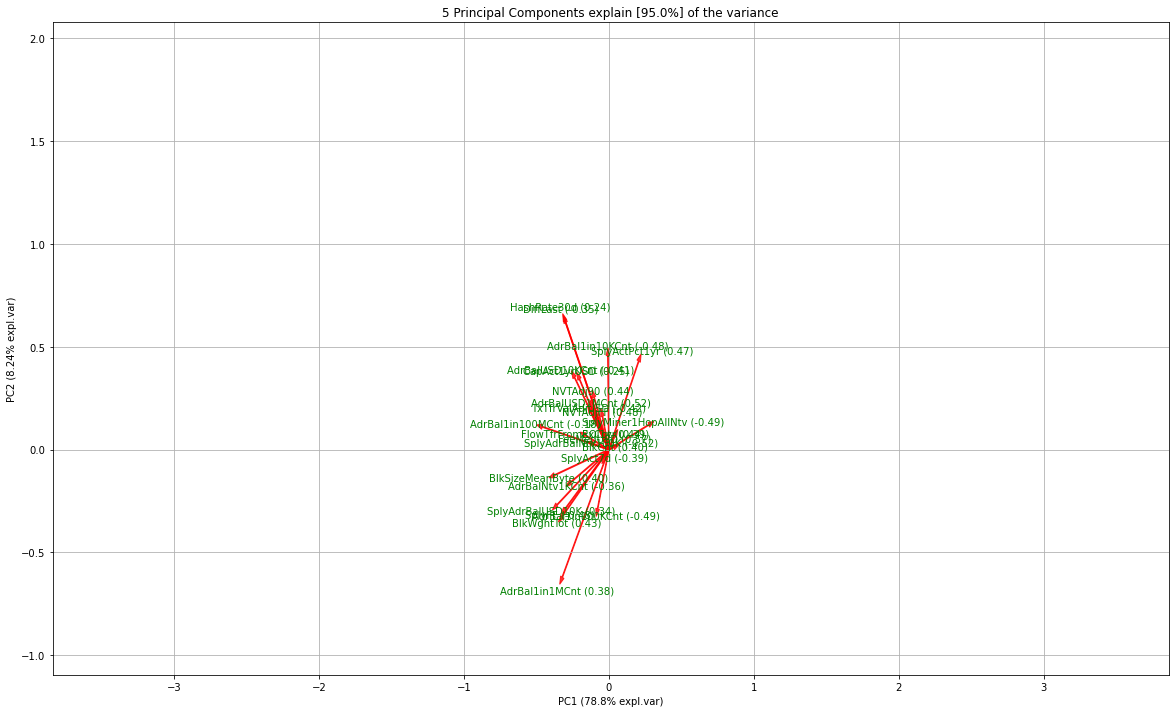

(<Figure size 1440x864 with 1 Axes>,
 <AxesSubplot:title={'center':'5 Principal Components explain [95.0%] of the variance'}, xlabel='PC1 (78.8% expl.var)', ylabel='PC2 (8.24% expl.var)'>)

In [36]:
model.biplot(cmap=None, label=False, legend=False,figsize=(20,12),visible=True)

['AdrBal1in100KCnt' 'AdrBal1in100MCnt' 'AdrBal1in10BCnt' 'AdrBal1in10KCnt'
 'AdrBal1in10MCnt' 'AdrBal1in1MCnt' 'AdrBalCnt' 'AdrBalNtv0.001Cnt'
 'AdrBalNtv0.1Cnt' 'AdrBalNtv100KCnt' 'AdrBalNtv10Cnt' 'AdrBalNtv1Cnt'
 'AdrBalNtv1KCnt' 'AdrBalNtv1MCnt' 'AdrBalUSD100Cnt' 'AdrBalUSD100KCnt'
 'AdrBalUSD10Cnt' 'AdrBalUSD10KCnt' 'AdrBalUSD1Cnt' 'AdrBalUSD1KCnt'
 'AdrBalUSD1MCnt' 'AssetEODCompletionTime' 'BlkCnt' 'BlkSizeMeanByte'
 'BlkWghtTot' 'CapAct1yrUSD' 'CapMVRVCur' 'CapMVRVFF' 'CapMrktCurUSD'
 'CapMrktFFUSD' 'DiffLast' 'FeeByteMeanNtv' 'FeeMeanNtv' 'FeeMedUSD'
 'FlowTfrFromExCnt' 'HashRate' 'HashRate30d' 'NVTAdj' 'NVTAdj90'
 'NVTAdjFF' 'NVTAdjFF90' 'PriceBTC' 'PriceUSD' 'ROI1yr' 'RevAllTimeUSD'
 'RevHashRateUSD' 'RevHashUSD' 'SER' 'SplyAct10yr' 'SplyAct1yr'
 'SplyAct2yr' 'SplyAct4yr' 'SplyAct5yr' 'SplyAct7d' 'SplyActEver'
 'SplyActPct1yr' 'SplyAdrBal1in100K' 'SplyAdrBal1in100M'
 'SplyAdrBal1in10B' 'SplyAdrBal1in10K' 'SplyAdrBal1in10M'
 'SplyAdrBal1in1M' 'SplyAdrBalNtv0.001' 'SplyAdrBalNtv

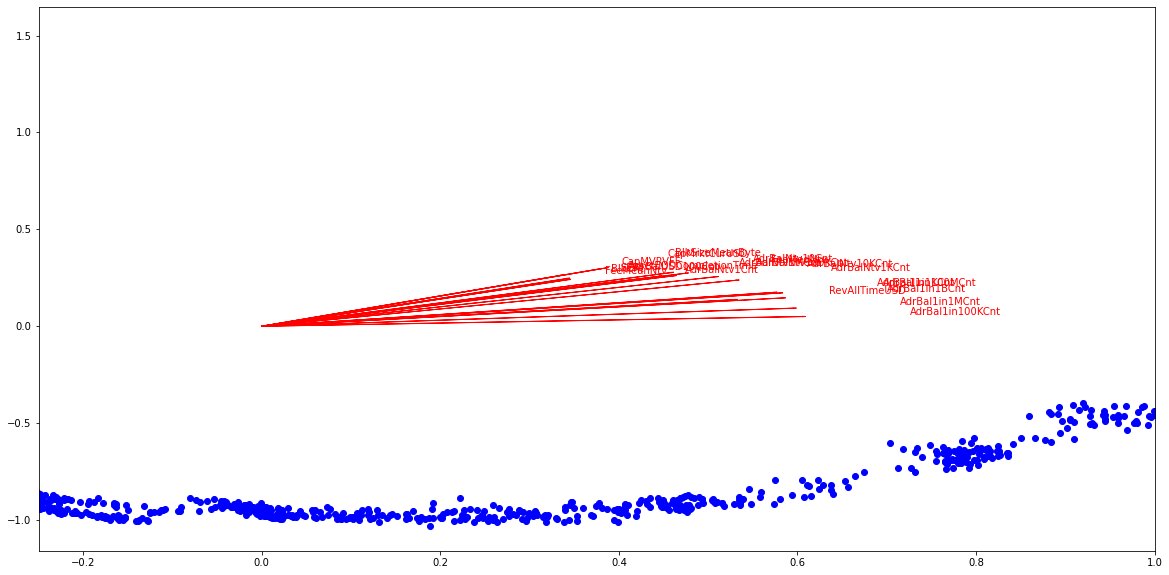

array(['AdrBal1in100MCnt', 'AdrBal1in10BCnt', 'AdrBalCnt',
       'AdrBalNtv0.001Cnt', 'AdrBalNtv0.1Cnt', 'AdrBalUSD100Cnt',
       'AdrBalUSD100KCnt', 'AdrBalUSD10Cnt', 'AdrBalUSD10KCnt',
       'AdrBalUSD1Cnt', 'AdrBalUSD1KCnt', 'AdrBalUSD1MCnt',
       'CapMrktCurUSD', 'CapMrktFFUSD', 'DiffLast', 'HashRate',
       'HashRate30d', 'PriceUSD', 'RevAllTimeUSD', 'SplyAdrBalUSD10M',
       'SplyMiner1HopAllUSD'], dtype=object)

In [41]:
#Eliminación de variables tomando en cuenta el peso y dirección de la variable PriceUSD

from sklearn.decomposition import PCA

n = len(df_regresion_wo.columns)

pca = PCA(n_components = n)
pca.fit(df_regresion_wo)
xvector = pca.components_[0]
yvector = pca.components_[1]
xs = pca.transform(df_regresion_wo)[:,0]
ys = pca.transform(df_regresion_wo)[:,1]

print(df_regresion_wo.columns.values) #vector priceUSD
print(df_regresion_wo.columns[42])
plt.xlim(-0.25,1)
lim = np.sqrt(xvector[42]**2 + yvector[42]**2)
feat = []

for i in range(len(xvector)):
    if(np.sqrt(xvector[i]**2 + yvector[i]**2) >= lim and (np.sign(xvector[i]) == np.sign(xvector[42]) and np.sign(yvector[i]) == np.sign(yvector[42]))):
    #if(xvector[i] >= lim or yvector[i]>=0.4):
        plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
                  color='r', width=0.0005, head_width=0.0025)
        plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.2,
                 list(df.columns.values)[i], color='r')
        feat.append(i)

for i in range(len(xs)):
    plt.plot(xs[i], ys[i], 'bo')

plt.show()
df_regresion_wo.columns.values[feat]

['AdrBal1in100KCnt' 'AdrBal1in100MCnt' 'AdrBal1in10BCnt' 'AdrBal1in10KCnt'
 'AdrBal1in10MCnt' 'AdrBal1in1MCnt' 'AdrBalCnt' 'AdrBalNtv0.001Cnt'
 'AdrBalNtv0.1Cnt' 'AdrBalNtv100KCnt' 'AdrBalNtv10Cnt' 'AdrBalNtv1Cnt'
 'AdrBalNtv1KCnt' 'AdrBalNtv1MCnt' 'AdrBalUSD100Cnt' 'AdrBalUSD100KCnt'
 'AdrBalUSD10Cnt' 'AdrBalUSD10KCnt' 'AdrBalUSD1Cnt' 'AdrBalUSD1KCnt'
 'AdrBalUSD1MCnt' 'AssetEODCompletionTime' 'BlkCnt' 'BlkSizeMeanByte'
 'BlkWghtTot' 'CapAct1yrUSD' 'CapMVRVCur' 'CapMVRVFF' 'CapMrktCurUSD'
 'CapMrktFFUSD' 'DiffLast' 'FeeByteMeanNtv' 'FeeMeanNtv' 'FeeMedUSD'
 'FlowTfrFromExCnt' 'HashRate' 'HashRate30d' 'NVTAdj' 'NVTAdj90'
 'NVTAdjFF' 'NVTAdjFF90' 'PriceBTC' 'PriceUSD' 'ROI1yr' 'RevAllTimeUSD'
 'RevHashRateUSD' 'RevHashUSD' 'SER' 'SplyAct10yr' 'SplyAct1yr'
 'SplyAct2yr' 'SplyAct4yr' 'SplyAct5yr' 'SplyAct7d' 'SplyActEver'
 'SplyActPct1yr' 'SplyAdrBal1in100K' 'SplyAdrBal1in100M'
 'SplyAdrBal1in10B' 'SplyAdrBal1in10K' 'SplyAdrBal1in10M'
 'SplyAdrBal1in1M' 'SplyAdrBalNtv0.001' 'SplyAdrBalNtv

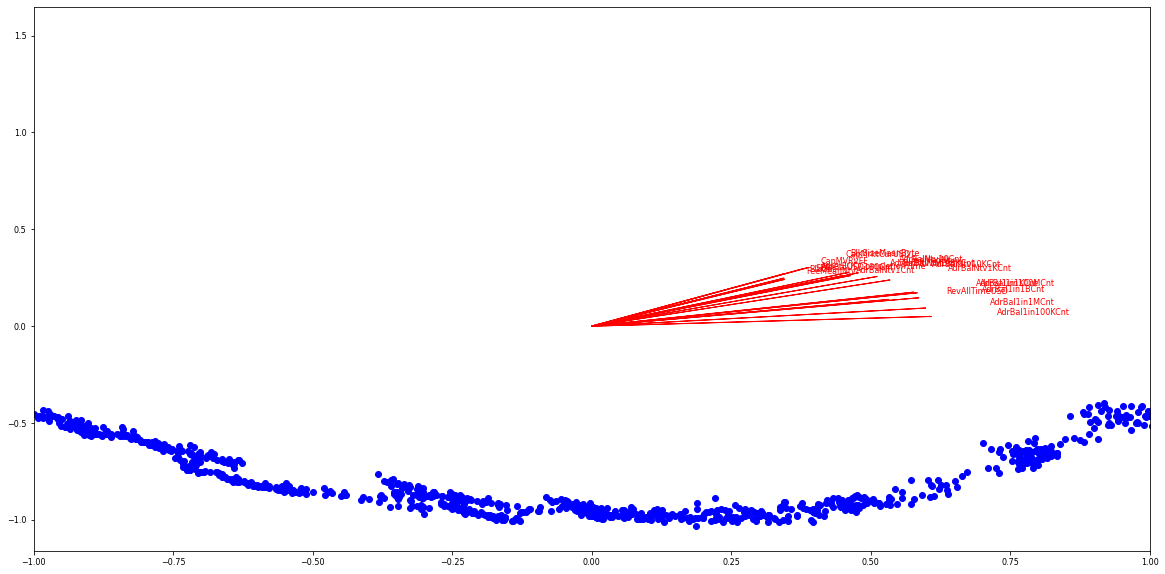

array(['AdrBal1in100MCnt', 'AdrBal1in10BCnt', 'AdrBalCnt',
       'AdrBalNtv0.001Cnt', 'AdrBalNtv0.1Cnt', 'AdrBalUSD100Cnt',
       'AdrBalUSD100KCnt', 'AdrBalUSD10Cnt', 'AdrBalUSD10KCnt',
       'AdrBalUSD1Cnt', 'AdrBalUSD1KCnt', 'AdrBalUSD1MCnt',
       'CapMrktCurUSD', 'CapMrktFFUSD', 'DiffLast', 'HashRate',
       'HashRate30d', 'PriceUSD', 'RevAllTimeUSD', 'SplyAdrBalUSD10M',
       'SplyMiner1HopAllUSD'], dtype=object)

In [90]:
#Eliminación de variables tomando en cuenta el peso y dirección de la variable PriceUSD

from sklearn.decomposition import PCA

n = len(df_regresion_wo.columns)

pca = PCA(n_components = n)
pca.fit(df_regresion_wo)
xvector = pca.components_[0]
yvector = pca.components_[1]
xs = pca.transform(df_regresion_wo)[:,0]
ys = pca.transform(df_regresion_wo)[:,1]

print(df_regresion_wo.columns.values) #vector priceUSD
print(xvector[42])
plt.xlim(-1,1)
lim = np.sqrt(xvector[42]**2 + yvector[42]**2)
feat = []

for i in range(len(xvector)):
    if(np.sqrt(xvector[i]**2 + yvector[i]**2) >= lim and (np.sign(xvector[i]) == np.sign(xvector[42]) and np.sign(yvector[i]) == np.sign(yvector[42]))):
    #if(xvector[i] >= lim or yvector[i]>=0.4):
        plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
                  color='r', width=0.0005, head_width=0.0025)
        plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.2,
                 list(df.columns.values)[i], color='r')
        feat.append(i)

for i in range(len(xs)):
    plt.plot(xs[i], ys[i], 'bo')

plt.show()
df_regresion_wo.columns.values[feat]

## Eliminamos las variables que tienen una norma menor al vector PriceUSD y con distinta dirección

## Total de **variables restantes 6**

In [42]:
df_red = df_regresion_wo[df_regresion_wo.columns.values[feat]].copy()
#df_red = df_red.drop(['VtyDayRet30d'],axis =1)

In [43]:
print(df_red)

      AdrBal1in100MCnt  AdrBal1in10BCnt  AdrBalCnt  AdrBalNtv0.001Cnt  \
0             0.000000         0.000000   0.000000           0.000000   
1             0.000005         0.000007   0.000003           0.000007   
2             0.000146         0.000038   0.000013           0.000034   
3             0.000218         0.000062   0.000023           0.000054   
4             0.000213         0.000082   0.000032           0.000072   
...                ...              ...        ...                ...   
3176          0.988554         0.985566   0.991781           0.986870   
3177          0.982976         0.985424   0.991576           0.986859   
3178          0.979711         0.985457   0.991223           0.987111   
3179          0.979050         0.987343   0.998506           0.992153   
3180          0.978099         0.984874   0.997315           0.989671   

      AdrBalNtv0.1Cnt  AdrBalUSD100Cnt  AdrBalUSD100KCnt  AdrBalUSD10Cnt  \
0            0.000000         0.000365         

In [45]:
#Tabla de correlación de las variables.

import dcor
distcorr = lambda column1, column2: dcor.distance_correlation(column1, column2) 
rslt = df_red.apply(lambda col1: df_red.apply(lambda col2: distcorr(col1, col2)))
pd.options.display.float_format = '{:,.2f}'.format
rslt

,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBalCnt,AdrBalNtv0.001Cnt,AdrBalNtv0.1Cnt,AdrBalUSD100Cnt,AdrBalUSD100KCnt,AdrBalUSD10Cnt,AdrBalUSD10KCnt,AdrBalUSD1Cnt,...,AdrBalUSD1MCnt,CapMrktCurUSD,CapMrktFFUSD,DiffLast,HashRate,HashRate30d,PriceUSD,RevAllTimeUSD,SplyAdrBalUSD10M,SplyMiner1HopAllUSD
AdrBal1in100MCnt,1.00,0.99,0.99,0.99,1.00,0.95,0.93,0.96,0.93,0.97,...,0.91,0.90,0.90,0.84,0.84,0.84,0.90,0.91,0.97,0.90
AdrBal1in10BCnt,0.99,1.00,0.99,1.00,1.00,0.98,0.95,0.99,0.96,0.99,...,0.94,0.94,0.93,0.89,0.89,0.89,0.93,0.95,0.98,0.93
AdrBalCnt,0.99,0.99,1.00,0.99,0.99,0.97,0.95,0.98,0.95,0.99,...,0.94,0.93,0.93,0.85,0.86,0.85,0.93,0.91,0.98,0.93
AdrBalNtv0.001Cnt,0.99,1.00,0.99,1.00,0.99,0.98,0.95,0.99,0.96,0.99,...,0.94,0.94,0.93,0.89,0.89,0.89,0.93,0.95,0.98,0.93
AdrBalNtv0.1Cnt,1.00,1.00,0.99,0.99,1.00,0.96,0.94,0.97,0.94,0.98,...,0.92,0.91,0.91,0.86,0.86,0.86,0.91,0.93,0.98,0.91
AdrBalUSD100Cnt,0.95,0.98,0.97,0.98,0.96,1.00,0.98,1.00,0.99,0.99,...,0.98,0.98,0.98,0.90,0.90,0.90,0.98,0.94,0.98,0.98
AdrBalUSD100KCnt,0.93,0.95,0.95,0.95,0.94,0.98,1.00,0.98,0.99,0.98,...,0.99,0.98,0.99,0.85,0.85,0.84,0.99,0.90,0.97,0.98
AdrBalUSD10Cnt,0.96,0.99,0.98,0.99,0.97,1.00,0.98,1.00,0.98,1.00,...,0.97,0.97,0.97,0.91,0.91,0.91,0.97,0.95,0.98,0.97
AdrBalUSD10KCnt,0.93,0.96,0.95,0.96,0.94,0.99,0.99,0.98,1.00,0.98,...,1.00,0.99,0.99,0.86,0.87,0.86,0.99,0.91,0.98,0.99
AdrBalUSD1Cnt,0.97,0.99,0.99,0.99,0.98,0.99,0.98,1.00,0.98,1.00,...,0.97,0.97,0.96,0.89,0.90,0.89,0.96,0.94,0.98,0.96


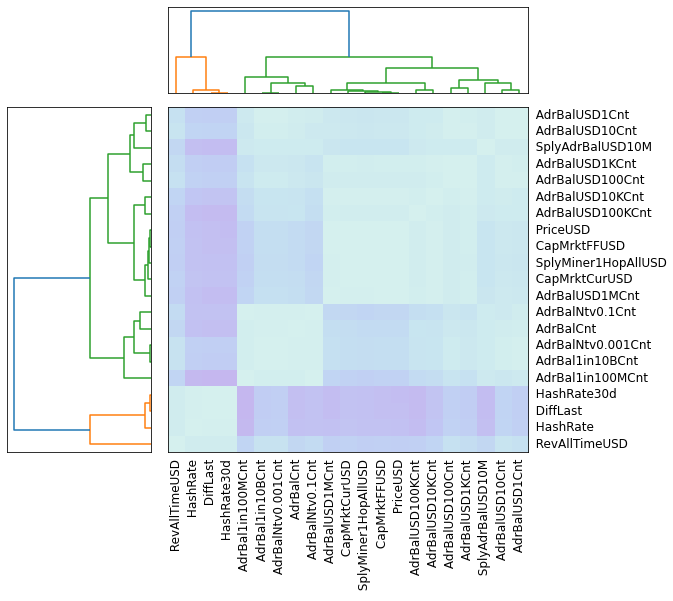

In [64]:
#Dendograma de correlación entre variables.
import dcor
from biokit.viz import heatmap

df_red.rename(index=str, columns={"Gross pay transform": "Gross pay tr"}, inplace=True)
distcorr = lambda column1, column2: dcor.distance_correlation(column1, column2)
rslt = df_red.apply(lambda col1: df_red.apply(lambda col2: distcorr(col1, col2)))
h = heatmap.Heatmap(rslt)
h.plot(vmin=0.0, vmax=1.1, cmap='cubehelix',colorbar=False)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.gcf().get_axes()[1].invert_xaxis();
plt.savefig('BTC_dendograma.png', dpi = 300)

In [ ]:
#['AdrActCnt', 'BlkSizeByte', 'BlkSizeMeanByte', 'CapMrktCurUSD',
#       'CapRealUSD', 'DiffMean', 'HashRate', 'PriceUSD', 'SplyCur',
#       'SplyFF', 'TxCnt', 'VtyDayRet180d'], dtype=object)

In [3]:
#Export metrics

import coinmetrics
cm = coinmetrics.Community()
moneda = 'btc'
available_data_types = cm.get_available_data_types_for_asset(moneda)

#Métricas usadas para análisis final.
metrica = "AdrActCnt,BlkSizeByte,BlkSizeMeanByte,CapMrktCurUSD,\
CapRealUSD,DiffMean,HashRate,PriceUSD,SplyCur,SplyFF,TxCnt"

begin_timestamp = "2000-01-01"
end_timestamp = '2021-03-19'
asset_data = cm.get_asset_data_for_time_range(moneda, metrica ,begin_timestamp, end_timestamp)

InvalidMetricError: Invalid metrics: 'BlkSizeByte'

In [45]:
print(asset_data['metrics'])
print(asset_data['series'][-1]['values'])

['AdrActCnt', 'BlkSizeByte', 'BlkSizeMeanByte', 'CapMrktCurUSD', 'CapRealUSD', 'DiffMean', 'HashRate', 'PriceUSD', 'SplyCur', 'SplyFF', 'TxCnt']
['1208973.0', '211611745.0', '1347845.509554140127', None, '369683733187.301855917451670139630936', '20608845737768.1602', None, '57342.0256616014', '18700669.04793575', '14574959.56631268', '309762.0']


In [46]:
dates = [] 
for i in range(len(asset_data['series'])):
    dates.append(asset_data['series'][i]['time'])

In [47]:
import datetime
import pandas as pd
dates = [date.rstrip("T00:00:00.000Z") for date in dates]

for i in range(len(dates)):
    dates[i] = datetime.datetime.strptime(dates[i], '%Y-%m-%d')
    
dates = pd.DataFrame(dates,columns=['Date'])

In [48]:
%%time
db = coinmetrics.cm_to_pandas(asset_data)
db.set_index(dates['Date'])
db.index = pd.to_datetime(db.index, errors='coerce',format='%Y-%m-%d')
db = db.interpolate(method='polynomial', order=2)
for name in db.columns:
    db[name] = db[name].fillna(0)    

CPU times: user 33.2 ms, sys: 3.01 ms, total: 36.2 ms
Wall time: 34.5 ms


In [49]:
print(db)

                             AdrActCnt    BlkSizeByte  BlkSizeMeanByte  \
2009-01-03 00:00:00+00:00         0.00           0.00             0.00   
2009-01-04 00:00:00+00:00         0.00           0.00             0.00   
2009-01-05 00:00:00+00:00         0.00           0.00             0.00   
2009-01-06 00:00:00+00:00         0.00           0.00             0.00   
2009-01-07 00:00:00+00:00         0.00           0.00             0.00   
...                                ...            ...              ...   
2021-05-01 00:00:00+00:00 1,040,203.00 185,704,088.00     1,336,000.63   
2021-05-02 00:00:00+00:00 1,248,724.00 262,362,193.00     1,418,174.02   
2021-05-03 00:00:00+00:00 1,268,856.00 258,018,943.00     1,457,734.14   
2021-05-04 00:00:00+00:00 1,293,836.00 242,190,008.00     1,338,066.34   
2021-05-05 00:00:00+00:00 1,208,973.00 211,611,745.00     1,347,845.51   

                                 CapMrktCurUSD         CapRealUSD  \
2009-01-03 00:00:00+00:00                 

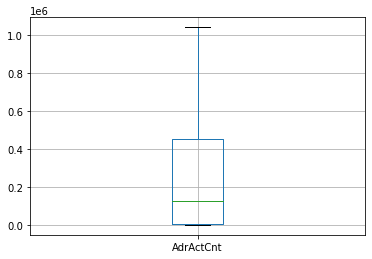

In [15]:
boxplot = db.boxplot(column=['AdrActCnt'])

In [12]:
#Eliminación de outliers de cada métrica
Q1 = db.quantile(0.25)
Q3 = db.quantile(0.75)
IQR = Q3 - Q1

db = db[~((db < (Q1 - 1.5 * IQR)) |(db > (Q3 + 1.5 * IQR))).any(axis=1)]

In [13]:
print(db)

                           AdrActCnt  CapMrktCurUSD      DiffMean  \
2009-01-03 00:00:00+00:00        0.0   0.000000e+00  0.000000e+00   
2009-01-04 00:00:00+00:00        0.0   0.000000e+00  0.000000e+00   
2009-01-05 00:00:00+00:00        0.0   0.000000e+00  0.000000e+00   
2009-01-06 00:00:00+00:00        0.0   0.000000e+00  0.000000e+00   
2009-01-07 00:00:00+00:00        0.0   0.000000e+00  0.000000e+00   
...                              ...            ...           ...   
2019-07-03 00:00:00+00:00   883931.0   2.127013e+11  7.934713e+12   
2019-07-04 00:00:00+00:00   814107.0   1.989323e+11  7.934713e+12   
2019-07-05 00:00:00+00:00   837154.0   1.957793e+11  7.934713e+12   
2019-07-06 00:00:00+00:00   654703.0   1.995393e+11  7.934713e+12   
2019-07-07 00:00:00+00:00   614084.0   2.039755e+11  7.934713e+12   

                               PriceUSD  FeeTotNtv       SplyCur  \
2009-01-03 00:00:00+00:00      0.000000   0.000000  0.000000e+00   
2009-01-04 00:00:00+00:00      0.00

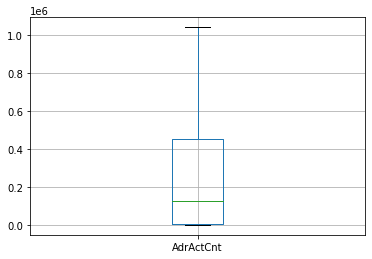

In [16]:
boxplot = db.boxplot(column=['AdrActCnt'])

In [6]:
df = pd.DataFrame(db.values)
df.columns = db.columns

In [7]:
print(df)

      AdrActCnt  CapMrktCurUSD      DiffMean      PriceUSD   FeeTotNtv  \
0           0.0   0.000000e+00  0.000000e+00      0.000000    0.000000   
1           0.0   0.000000e+00  0.000000e+00      0.000000    0.000000   
2           0.0   0.000000e+00  0.000000e+00      0.000000    0.000000   
3           0.0   0.000000e+00  0.000000e+00      0.000000    0.000000   
4           0.0   0.000000e+00  0.000000e+00      0.000000    0.000000   
...         ...            ...           ...           ...         ...   
4500  1122022.0   1.079501e+12  2.358198e+13  57741.444417  145.111318   
4501  1040203.0   1.081835e+12  2.289752e+13  57863.590393   98.810340   
4502  1248724.0   1.057763e+12  2.060885e+13  56572.596841   84.387820   
4503  1268856.0   1.070362e+12  2.060885e+13  57243.041605  113.249672   
4504  1293836.0   1.004624e+12  2.060885e+13  53724.108925   97.530028   

           SplyCur        SplyFF  TxTfrCnt  TxTfrValMeanUSD   TxTfrValUSD  \
0     0.000000e+00  0.000000e+00  

In [10]:
#Eliminación de outliers multivariados.
from sklearn.covariance import EmpiricalCovariance, MinCovDet
import numpy as np

def m_detectOutliers(data, extreme=False):
    robust_cov = MinCovDet().fit(data)
    m = robust_cov.mahalanobis(data)
    # one popular way to specify the threshold
    me = np.mean(m)
    t = 3. * me if extreme else 2. * me
    outliers = []
    for i in range(len(m)):
        if m[i] > t:
            outliers.append(i)  # index of the outlier
    return np.array(outliers)

df_wo = df.drop(m_detectOutliers(df, extreme = True))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/covariance/_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (224.823342966132600 > 224.809002984257830). You may want to try with a higher value of support_fraction (current value: 0.502).
  warnings.warn("Determinant has increased; this should not happen: "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/covariance/_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (224.819293186408373 > 224.801477288514434). You may want to try with a higher value of support_fraction (current value: 0.502).
  warnings.warn("Determinant has increased; this should not happen: "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/covariance/_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (224.823342966132600 > 224.813999071003082). Yo

In [11]:
df_wo.set_index(dates['Date'])
df_wo.index = pd.to_datetime(df_wo.index, errors='coerce',format='%Y-%m-%d')

ValueError: Length mismatch: Expected 3906 rows, received array of length 4505

In [28]:
print(df_wo)
print(db)

      AdrActCnt  CapMrktCurUSD      DiffMean      PriceUSD  FeeTotNtv  \
0           0.0   0.000000e+00  0.000000e+00      0.000000   0.000000   
1           0.0   0.000000e+00  0.000000e+00      0.000000   0.000000   
2           0.0   0.000000e+00  0.000000e+00      0.000000   0.000000   
3           0.0   0.000000e+00  0.000000e+00      0.000000   0.000000   
4           0.0   0.000000e+00  0.000000e+00      0.000000   0.000000   
...         ...            ...           ...           ...        ...   
3901   769573.0   1.852174e+11  1.077200e+13  10332.464442  32.885576   
3902   807975.0   1.808214e+11  1.077200e+13  10085.951924  37.438135   
3903   783950.0   1.818522e+11  1.077200e+13  10142.148060  34.614146   
3904   757805.0   1.865564e+11  1.077200e+13  10403.359971  29.373658   
3905   759154.0   1.855353e+11  1.099572e+13  10345.338747  27.241699   

           SplyCur        SplyFF  TxTfrCnt  TxTfrValMeanUSD   TxTfrValUSD  \
0     0.000000e+00  0.000000e+00       0.0    

In [50]:
nombreBolsa = 'BTC'
db.to_csv('cleaning/'+nombreBolsa+' - coinMetrics.csv', encoding='utf-8', index=True)